## Problem Set 3: Neural Networks

### Overview
In this problem set, you'll explore the foundational concepts of neural networks, covering basic architecture, activation functions, forward propagation, regularization, and adaptive learning. You'll also complete coding exercises to implement neural network components and train a basic neural network. You will both complete this Python script (`ps3.ipynb`) and submit a LaTeX report (`ps3.tex` and `ps3.pdf`).

## 1. Basic Architecture of a Neural Network

A neural network is composed of layers of neurons: input layer, hidden layer(s), and an output layer. Each neuron receives inputs, processes them, and passes the result to the next layer.

In this section, you'll implement a basic 3-layer neural network structure.

In [15]:
import numpy as np

# Sigmoid activation function
f = lambda x: 1.0 / (1.0 + np.exp(-x))

# Initialize random weights and biases
np.random.seed(0)  # For reproducibility
W1 = np.random.randn(4, 3)  # 4 neurons in the hidden layer, 3 input features
b1 = np.random.randn(4, 1)
W3 = np.random.randn(1, 4)  # 1 output neuron, 4 inputs from hidden layer
b3 = np.random.randn(1, 1)

# Input vector (3x1)
x = np.random.randn(3, 1)

print("Output:", out)


Output: [[-1.64823256]]


## 2. Activation Functions


Activation functions introduce non-linearity into the network, allowing it to learn more complex patterns. Common functions include:

- **Sigmoid**: S-shaped curve, useful for binary classifications.
- **ReLU (Rectified Linear Unit)**: Outputs zero if input is negative, otherwise outputs the input.
- **Leaky ReLU**: Similar to ReLU but with a small gradient for negative inputs.

### Exercise:
Write functions for each activation function and plot them over a range of inputs.


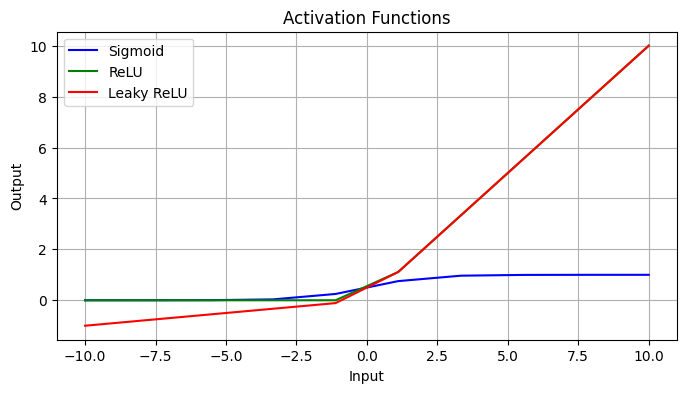

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.1):
    return np.where(x > 0, x, alpha * x)

# Generate a range of inputs
x = np.linspace(-10, 10, 10)

# Calculate outputs for each activation function
y_sigmoid = sigmoid(x)
y_relu = relu(x)
y_leaky_relu = leaky_relu(x)

# Plot the activation functions
plt.figure(figsize=(8, 4))

# Sigmoid
plt.plot(x, y_sigmoid, label='Sigmoid', color='blue')

# ReLU
plt.plot(x, y_relu, label='ReLU', color='green')

# Leaky ReLU
plt.plot(x, y_leaky_relu, label='Leaky ReLU', color='red')

# Add labels and legend
plt.title("Activation Functions")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()
plt.grid(True)
plt.show()

## 3. Forward Propagation

Forward propagation is the process of passing inputs through the network to generate an output.

### Exercise:
Implement forward propagation for a 3-layer neural network.

In [18]:
# Forward pass
h1 = f(np.dot(W1, x) + b1)  # First hidden layer activations
out = np.dot(W3, h1) + b3   # Output neuron (no activation for final output)


## 4. Overfitting and Regularization

Overfitting occurs when a model learns the noise in the training data rather than the actual pattern. Regularization helps control this.

Common techniques include:

- **L2 Regularization**: Adds a penalty based on the sum of squared weights.
- **Dropout**: Randomly ignores some neurons during training.

### Exercise:
Implement L2 regularization in the loss calculation.

In [19]:
# Assume 'y_true' is the true output and 'y_pred' is the predicted output from the network
y_true = np.array([[1]])  # example true output
y_pred = out              # predicted output from the forward pass

# Regularization factor (hyperparameter to control regularization strength)
lambda_reg = 0.01

# Mean Squared Error Loss
mse_loss = np.mean((y_true - y_pred) ** 2)

# L2 Regularization term
l2_loss = lambda_reg * (np.sum(W1**2) + np.sum(W3**2))

# Total Loss with L2 Regularization
total_loss = mse_loss + l2_loss

print("MSE Loss:", mse_loss)
print("L2 Loss:", l2_loss)
print("Total Loss with L2 Regularization:", total_loss)

MSE Loss: 7.013135686644147
L2 Loss: 0.20036717101525667
Total Loss with L2 Regularization: 7.213502857659404


In [31]:
# SVM Classifier
def svm_loss(X, y, W, b, reg_lambda=0.1):
    N = X.shape[0]
    loss = 0.0
    for i in range(N):
        loss += L1_i(X[i], y[i], W, b)
    loss /= N
    # Add L2 regularization
    loss += reg_lambda * np.sum(W * W)
    return loss

# Softmax Classifier
def softmax_loss(X, y, W, b, reg_lambda=0.1):
    N = X.shape[0]
    loss = 0.0
    for i in range(N):
        loss += L2_i(X[i], y[i], W, b)
    loss /= N
    # Add L2 regularization
    loss += reg_lambda * np.sum(W * W)
    return loss

In [32]:
svm_loss_value = svm_loss(X, y, W, b)
print("SVM Loss:", svm_loss_value)

softmax_loss_value = softmax_loss(X, y, W, b)
print("Softmax Loss:", softmax_loss_value)

NameError: name 'X' is not defined

In [25]:
import numpy as np

# Assuming L1_i and L2_i are the individual loss functions for each sample
def L1_i(X, y, W, b):
    # Dummy implementation for L1 loss
    return np.maximum(0, 1 - y * (np.dot(W, X) + b))  # Example SVM hinge loss

def L2_i(X, y, W, b):
    # Dummy implementation for L2 loss
    scores = np.dot(W, X) + b
    exp_scores = np.exp(scores - np.max(scores))  # Stability in softmax
    probs = exp_scores / np.sum(exp_scores)
    return -np.log(probs[int(y)])  # Cross-entropy for softmax

# SVM Classifier
def svm_loss(X, y, W, b, reg_lambda=0.1):
    N = X.shape[0]
    loss = 0.0
    for i in range(N):
        loss += L1_i(X[i], y[i], W, b)
    loss /= N
    # Calculate L2 regularization
    l2_loss = reg_lambda * np.sum(W * W)
    total_loss = loss + l2_loss

    # Print L2 loss and total loss
    print("L2 Loss:", l2_loss)
    print("Total Loss with L2 Regularization:", total_loss)
    
    return total_loss

# Softmax Classifier
def softmax_loss(X, y, W, b, reg_lambda=0.1):
    N = X.shape[0]
    loss = 0.0
    for i in range(N):
        loss += L2_i(X[i], y[i], W, b)
    loss /= N
    # Calculate L2 regularization
    l2_loss = reg_lambda * np.sum(W * W)
    total_loss = loss + l2_loss

    # Print L2 loss and total loss
    print("L2 Loss:", l2_loss)
    print("Total Loss with L2 Regularization:", total_loss)

    return total_loss

In [26]:
import numpy as np

# Assuming L1_i and L2_i are the individual loss functions for each sample

# Dummy implementation for SVM Loss (L1 Loss)
def L1_i(X, y, W, b):
    return np.maximum(0, 1 - y * (np.dot(W.T, X) + b))  # Example SVM hinge loss

# Dummy implementation for Softmax Loss (L2 Loss)
def L2_i(X, y, W, b):
    scores = np.dot(W.T, X) + b
    exp_scores = np.exp(scores - np.max(scores))  # For numerical stability
    probs = exp_scores / np.sum(exp_scores)
    return -np.log(probs[int(y)])  # Cross-entropy for softmax

# SVM Classifier
def svm_loss(X, y, W, b, reg_lambda=0.1):
    N = X.shape[0]
    loss = 0.0
    for i in range(N):
        loss += L1_i(X[i], y[i], W, b)
    loss /= N
    # Calculate L2 regularization
    l2_loss = reg_lambda * np.sum(W * W)
    total_loss = loss + l2_loss

    # Print L2 loss and total loss
    print("SVM Loss (without regularization):", loss)
    print("L2 Loss:", l2_loss)
    print("Total Loss with L2 Regularization:", total_loss)
    
    return total_loss

# Softmax Classifier
def softmax_loss(X, y, W, b, reg_lambda=0.1):
    N = X.shape[0]
    loss = 0.0
    for i in range(N):
        loss += L2_i(X[i], y[i], W, b)
    loss /= N
    # Calculate L2 regularization
    l2_loss = reg_lambda * np.sum(W * W)
    total_loss = loss + l2_loss

    # Print L2 loss and total loss
    print("Softmax Loss (without regularization):", loss)
    print("L2 Loss:", l2_loss)
    print("Total Loss with L2 Regularization:", total_loss)

    return total_loss

# Test the functions with some dummy data

# Example for SVM Loss
X_svm = np.random.randn(5, 3)  # 5 samples, 3 features
y_svm = np.random.randint(0, 2, 5)  # Binary labels (0 or 1) for SVM
W_svm = np.random.randn(3, 1)  # 3 features, 1 output neuron for SVM
b_svm = np.random.randn(1)  # Bias term

# Compute SVM Loss with regularization
svm_loss(X_svm, y_svm, W_svm, b_svm)

# Example for Softmax Loss
X_softmax = np.random.randn(5, 3)  # 5 samples, 3 features
y_softmax = np.random.randint(0, 3, 5)  # 3 classes for Softmax
W_softmax = np.random.randn(3, 3)  # 3 features, 3 output classes
b_softmax = np.random.randn(3)  # Bias for 3 output classes

# Compute Softmax Loss with regularization
softmax_loss(X_softmax, y_softmax, W_softmax, b_softmax)

SVM Loss (without regularization): [0.94925811]
L2 Loss: 0.024877557109970364
Total Loss with L2 Regularization: [0.97413567]
Softmax Loss (without regularization): 3.054079969450471
L2 Loss: 0.399308390877835
Total Loss with L2 Regularization: 3.453388360328306


np.float64(3.453388360328306)

## 5. Training a Neural Network

Training involves adjusting the weights and biases to minimize the loss. A popular method is gradient descent.

### Exercise:
Implement a simple gradient descent loop to train the neural network.

In [ ]:
# Type your code here

## 6. Adaptive Learning Rates


Adaptive learning rate methods, like Adam, adjust the learning rate based on past gradients, improving training stability.

### Exercise:
Implement a simple version of the Adam optimizer for gradient descent.

In [ ]:
# Type your code here